In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
import plotly.graph_objects as go

In [2]:
%matplotlib inline


In [3]:
df = pd.read_csv("disney_plus_titles.csv", encoding='latin-1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [5]:
#adding more columns for analysis
df['date_added'] = pd.to_datetime(df['date_added'])
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = df['date_added'].dt.month_name()
df['Month'] = df['Month'].astype(CategoricalDtype(categories=month_names, ordered=False))
df['Year'] = df['date_added'].dt.year


In [6]:
df['season_count'] = df.apply(lambda x:x['duration'].split(" ")[0] if 'Season' in x['duration'] else "",axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [7]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year,season_count
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!,November,2021.0,
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...,November,2021.0,


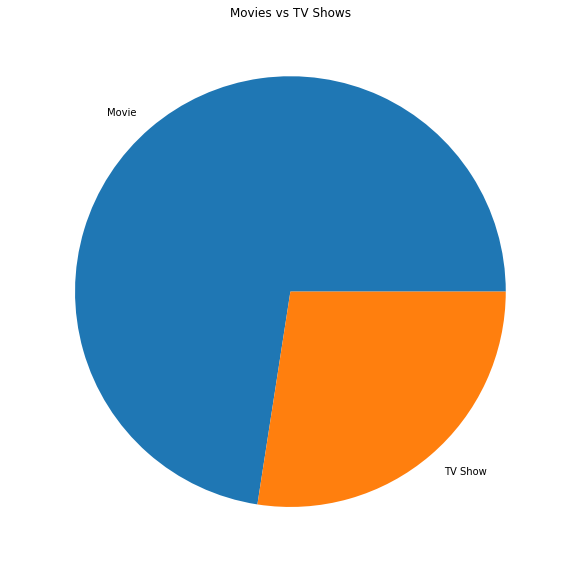

In [8]:
df['type'].value_counts().plot(kind='pie',figsize=(10,8))
plt.ylabel(" ")
plt.title("Movies vs TV Shows")
plt.tight_layout()

In [17]:
disney_shows = df[df['type'] == 'TV Show']
disney_movies = df[df['type'] == 'Movie']

v1 = disney_shows['Year'].value_counts().reset_index()
v1 = v1.rename(columns = {"index" : "Year", "Year" : "Count"})
v1['Percent'] = v1['Count'].apply(lambda x : 100*x/sum(v1['Count']))
v1 = v1.sort_values('Year')

v2 = disney_movies['Year'].value_counts().reset_index()
v2 = v2.rename(columns = {"index" : "Year", "Year" : "Count"})
v2['Percent'] = v2['Count'].apply(lambda x : 100*x/sum(v2['Count']))
v2 = v2.sort_values('Year')

trace1 = go.Bar(x=v1['Year'], y=v1["Count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=v2['Year'], y=v2["Count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years on Disney+", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [24]:
col = 'Month'
v1 = df['Month'].value_counts().reset_index()
v1 = v1.rename(columns = {"index" : "Month", "Month" : "Count"})
v1['Percent'] = v1['Count'].apply(lambda x : 100*x/sum(v1['Count']))
v1 = v1.sort_values('Month')

trace1 = go.Bar(x=v1['Month'], y=v1["Count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="In which month, the conent is added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

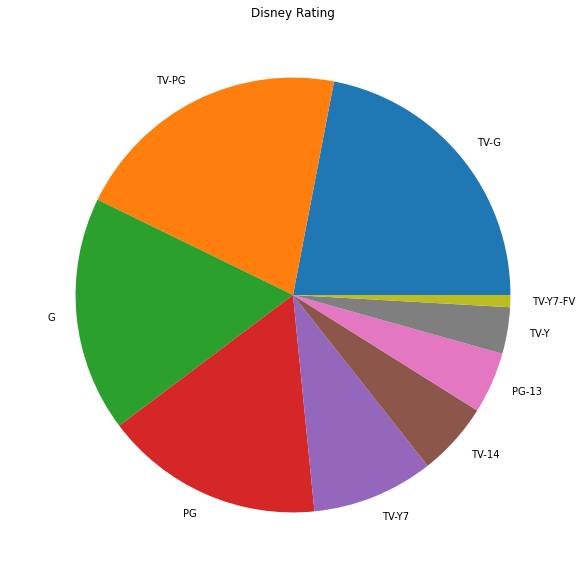

In [18]:
df.rating.value_counts().plot(kind='pie',figsize=(20,10))
plt.ylabel(" ")
plt.title("Disney Rating")
plt.show()

In [19]:
#Some of the oldest movies on Disney+

oldest = df.sort_values("release_year", ascending = True)
oldest = oldest[oldest['duration'] != ""]
oldest[['title', "release_year"]][:15]

,title,release_year
1220,Steamboat Willie,1928
893,Flowers and Trees,1932
1178,Santa's Workshop,1932
736,Babes in the Woods,1932
1317,The Pied Piper,1933
1418,Ye Olden Days,1933
1362,Three Little Pigs,1933
1356,The Wise Little Hen,1934
922,Grasshopper and the Ants,1934
1279,The Goddess of Spring,1934


In [26]:
disney_movies['release_year'].value_counts().reset_index()

,index,release_year
0,2020,74
1,2021,70
2,2019,61
3,2011,35
4,2014,34
...,...,...
85,1944,1
86,1970,1
87,1945,1
88,1982,1


In [29]:
# disney movies realse over the year

dm = disney_movies['release_year'].value_counts().reset_index()
dm = dm.rename(columns = {'index' : "Release Year", "release_year": 'Count'})
dm['Percent'] = dm['Count'].apply(lambda x : 100*x/sum(dm['Count']))
dm = dm.sort_values('Release Year')

fig1 = go.Bar(x = dm['Release Year'], y=dm['Count'], name='Movies', marker=dict(color='red'))
data = [fig1]
layout = go.Layout(title='Movies Release Year', legend=dict(x=0.1, y=1.1, orientation='h'))
fig = go.Figure(data, layout=layout)
fig.show()

In [30]:
# disney shows realse over the year
ds = disney_shows['release_year'].value_counts().reset_index()
ds = dm.rename(columns = {'index' : "Release Year", "release_year": 'Count'})
ds['percent'] = ds['Count'].apply(lambda x : 100*x/sum(ds['Count']))
ds = ds.sort_values('Release Year')

fig2 = go.Bar(x = ds['Release Year'], y=ds['Count'], name='TV Shows', marker=dict(color='red'))
data = [fig2]
layout = go.Layout(title='TV Shows content added on disney', legend=dict(x=0.1, y=1.1, orientation='h'))
fig = go.Figure(data, layout=layout)
fig.show()